In [2]:
import pandas as pd
import numpy as np
import thinkstats2
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import random
import thinkplot

In [3]:
data = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_train.csv')

In [4]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


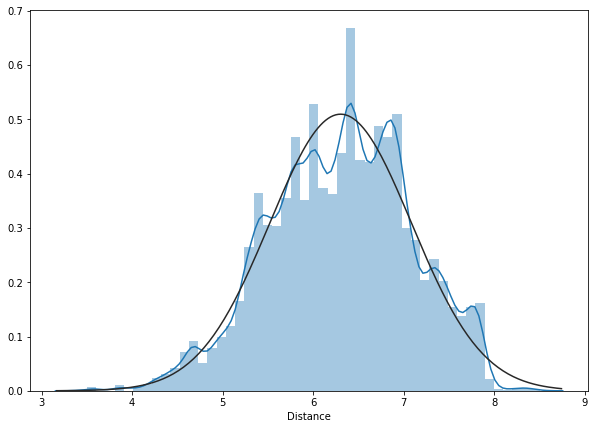

In [7]:
plt.figure(figsize=(10, 7))
sns.distplot(np.log(data['Distance']), fit=scipy.stats.norm)

In [8]:
data['Distance'] = np.log(data['Distance'])

In [10]:
d = {'c-21':21, 'c-20':20, 'c-2':2, 'c-25':25, 'c-7':7, 'c-3':3, 'c-27':27, 'c-29':29,
       'c-28':28, 'c-5':5, 'c-6':6, 'c-10':10, 'c-19':19, 'c-26':26, 'c-14':14, 'c-22':22,
       'c-9':9, 'c-31':31, 'c-4':4, 'c-16':16, 'c-18':18, 'c-30':30, 'c-1':1, 'c-24':24,
       'c-15':15, 'c-17':17, 'c-8':8, 'c-12':12, 'c-13':13, 'c-11':11, 'c-23':23}
data['DayofMonth'] = data['DayofMonth'].map(d)

In [24]:
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [25]:
inter, slope = LeastSquares(data['Distance'], data['DayofMonth'])

In [26]:
inter, slope

(15.523860909735527, 0.02855192464965078)

In [27]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [34]:
fit_xs, fit_ys = FitLine(data['Distance'], inter, slope)

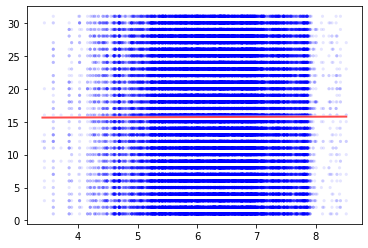

In [38]:
thinkplot.Scatter(data['Distance'], data['DayofMonth'], color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)

In [40]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [41]:
a = Residuals(data['Distance'], data['DayofMonth'], inter, slope)